### **Étape 3 : Notebook Jupyter - PARTIE 6 (Analyse du Risque)**

**Fichier :** `partie_6_credit_risk/analyse_credit_risk.ipynb`

```markdown
# PARTIE 6 : Analyse du Portefeuille Client et du Risque de Crédit

## 1. Poser la Question / Business Understanding

L'objectif de cette analyse est de mieux comprendre le portefeuille clients de la banque afin d'identifier les profils à risque, les clients les plus rentables, et fournir des recommandations business.

Les questions clés sont :
*   **Analyse Descriptive :** Quelle est la composition du portefeuille (âge, revenu, solde, score de crédit) ?
*   **Analyse du Risque :** Quel est le taux de défaut global ? Quels sont les facteurs associés au défaut (score, nombre de prêts, âge) ?
*   **Analyse Business :** Qui sont les clients les plus rentables (haut revenu + haut solde) ? Quelles villes sont les plus intéressantes financièrement (revenu, solde, score) ?
*   **Visualisation :** Créer des graphiques pour illustrer les distributions et les relations clés.

Ces insights permettront à la banque de mieux gérer son risque, de cibler ses efforts marketing et de développer des stratégies de croissance durable.

## 2. Collecte des Données


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Charger les données
df_risk = pd.read_csv('bank_clients_cameroon_risk_-_PARTIE_6_Cas_pratique_4.csv')

print("Aperçu des données de risque :")
print(df_risk.head())
print("\nInformations sur les données :")
print(df_risk.info())

Aperçu des données de risque :
  client_id      client_name gender  age     city  monthly_income_fcfa  \
0    CL2000      Jean Mballa      M   36  Bamenda               548106   
1    CL2001       Marie Nkou      F   26  Bamenda               538517   
2    CL2002  Didier Atangana      M   35   Douala              1022059   
3    CL2003  Sandrine Mballa      F   30   Garoua               531545   
4    CL2004  Patrick Essomba      M   59   Garoua               634740   

   account_balance_fcfa  credit_score  number_of_loans  default  
0               1180528           404                0        0  
1               1961701           817                0        0  
2               4953118           584                0        0  
3               2833559           404                0        0  
4                374488           770                0        0  

Informations sur les données :
<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #

In [4]:
## 3. Enquête et Préparation des Données (Data Cleaning)

In [5]:
# 1. Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df_risk.isnull().sum())

# 2. Vérifier les doublons (sur client_id)
print(f"\nNombre de doublons sur l'ID client : {df_risk['client_id'].duplicated().sum()}")

# 3. Vérifier les types de données
# Toutes les colonnes numériques semblent correctes. Nous nous assurons que 'default' est bien un int (0/1)
print("\nTypes de données :")
print(df_risk.dtypes)

# 4. Analyse descriptive préliminaire pour détecter les incohérences
print("\nStatistiques descriptives des variables numériques :")
print(df_risk.describe())

# Note: Les revenus et soldes ont des ordres de grandeur différents, ce qui est normal.
# Le score de crédit a une plage de 300 à 850 environ, ce qui est standard.


Valeurs manquantes par colonne :
client_id               0
client_name             0
gender                  0
age                     0
city                    0
monthly_income_fcfa     0
account_balance_fcfa    0
credit_score            0
number_of_loans         0
default                 0
dtype: int64

Nombre de doublons sur l'ID client : 0

Types de données :
client_id                 str
client_name               str
gender                    str
age                     int64
city                      str
monthly_income_fcfa     int64
account_balance_fcfa    int64
credit_score            int64
number_of_loans         int64
default                 int64
dtype: object

Statistiques descriptives des variables numériques :
              age  monthly_income_fcfa  account_balance_fcfa  credit_score  \
count  500.000000         5.000000e+02          5.000000e+02    500.000000   
mean    42.874000         7.971100e+05          2.451937e+06    584.878000   
std     13.330624         4.038

In [6]:
# 4. Analyse des Données

In [7]:
## Partie 1 - Analyse Descriptive

In [8]:
print(f"\n--- Analyse Descriptive ---")
# 1. Nombre de clients
n_clients = len(df_risk)
print(f"1. Nombre de clients dans le dataset : {n_clients}")

# 2. Revenu mensuel moyen
avg_income = df_risk['monthly_income_fcfa'].mean()
print(f"2. Revenu mensuel moyen des clients : {avg_income:,.0f} FCFA")

# 3. Solde moyen des comptes
avg_balance = df_risk['account_balance_fcfa'].mean()
print(f"3. Solde moyen des comptes : {avg_balance:,.0f} FCFA")

# 4. Distribution des scores de crédit
print(f"4. Distribution des scores de crédit :")
print(df_risk['credit_score'].describe())


--- Analyse Descriptive ---
1. Nombre de clients dans le dataset : 500
2. Revenu mensuel moyen des clients : 797,110 FCFA
3. Solde moyen des comptes : 2,451,937 FCFA
4. Distribution des scores de crédit :
count    500.000000
mean     584.878000
std      154.574985
min      300.000000
25%      448.250000
50%      597.500000
75%      718.250000
max      849.000000
Name: credit_score, dtype: float64


#Partie 2 - Analyse du Risque

In [10]:
print(f"\n--- Analyse du Risque ---")
# 5. Taux de défaut global
default_rate = df_risk['default'].mean() * 100
print(f"5. Taux de défaut global : {default_rate:.2f}%")

# 6. Score de crédit moyen par statut de défaut
avg_score_by_default = df_risk.groupby('default')['credit_score'].mean()
print(f"6. Score de crédit moyen :")
print(f"   - Clients sans défaut (default=0) : {avg_score_by_default[0]:.0f}")
print(f"   - Clients avec défaut (default=1) : {avg_score_by_default[1]:.0f}")
print(f"   -> Les clients en défaut ont un score de crédit en moyenne **{avg_score_by_default[0] - avg_score_by_default[1]:.0f} points plus bas**.")

# 7. Relation entre le nombre de prêts et le défaut
avg_loans_by_default = df_risk.groupby('default')['number_of_loans'].mean()
print(f"\n7. Nombre moyen de prêts :")
print(f"   - Clients sans défaut : {avg_loans_by_default[0]:.2f}")
print(f"   - Clients avec défaut : {avg_loans_by_default[1]:.2f}")
print(f"   -> Les clients en défaut ont en moyenne **{avg_loans_by_default[1] - avg_loans_by_default[0]:.2f} prêts de plus**.")

# 8. Groupe d'âge présentant le plus de risque
# Créer des tranches d'âge (bins)
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_risk['age_group'] = pd.cut(df_risk['age'], bins=bins, labels=labels, right=False)

default_by_age = df_risk.groupby('age_group', observed=True)['default'].mean() * 100
print(f"\n8. Taux de défaut par groupe d'âge :")
print(default_by_age.sort_values(ascending=False).to_string(float_format='%.2f%%'))
riskiest_age_group = default_by_age.idxmax()
print(f"   -> Le groupe d'âge le plus risqué est **{riskiest_age_group}** avec un taux de défaut de {default_by_age.max():.2f}%.")


--- Analyse du Risque ---
5. Taux de défaut global : 22.40%
6. Score de crédit moyen :
   - Clients sans défaut (default=0) : 603
   - Clients avec défaut (default=1) : 523
   -> Les clients en défaut ont un score de crédit en moyenne **79 points plus bas**.

7. Nombre moyen de prêts :
   - Clients sans défaut : 1.33
   - Clients avec défaut : 2.43
   -> Les clients en défaut ont en moyenne **1.10 prêts de plus**.

8. Taux de défaut par groupe d'âge :
age_group
18-29   27.03%
40-49   23.53%
50-59   22.22%
30-39   22.02%
60-69   14.29%
   -> Le groupe d'âge le plus risqué est **18-29** avec un taux de défaut de 27.03%.


# Partie 3 - Analyse Business

In [14]:
print(f"\n--- Analyse Business ---")

# 9. Clients les plus rentables (Revenu élevé ET Solde élevé)
# Créer un score de rentabilité simple: percentile du revenu + percentile du solde
df_risk['income_percentile'] = df_risk['monthly_income_fcfa'].rank(pct=True)
df_risk['balance_percentile'] = df_risk['account_balance_fcfa'].rank(pct=True)
df_risk['profitability_score'] = df_risk['income_percentile'] + df_risk['balance_percentile']

top_10_profitable = df_risk.nlargest(10, 'profitability_score')[['client_name', 'city', 'monthly_income_fcfa', 'account_balance_fcfa', 'credit_score', 'default']]
print(f"\n9. Top 10 des clients les plus rentables (haut revenu & haut solde) :")
print(top_10_profitable.to_string(index=False))

# Justification: Ce score combine les deux indicateurs de "valeur" pour la banque.
# Un client avec un revenu élevé a un fort potentiel de revenus futurs, et un solde élevé représente des dépôts que la banque peut utiliser.

# 10. Ville avec les clients les plus intéressants financièrement
# Créer un indicateur "Potentiel Client" combinant Revenu, Solde et Score de crédit (inversé car un score élevé est bon)
from sklearn.preprocessing import MinMaxScaler

# Normaliser les variables pour les combiner
scaler = MinMaxScaler()
df_risk['income_norm'] = scaler.fit_transform(df_risk[['monthly_income_fcfa']])
df_risk['balance_norm'] = scaler.fit_transform(df_risk[['account_balance_fcfa']])
# Pour le score de crédit, plus il est élevé, mieux c'est. On le normalise directement.
df_risk['credit_score_norm'] = scaler.fit_transform(df_risk[['credit_score']])

# Le "Potentiel Client" est la somme des trois. (Poids égal pour simplifier)
df_risk['client_potential'] = df_risk['income_norm'] + df_risk['balance_norm'] + df_risk['credit_score_norm']

city_potential = df_risk.groupby('city')['client_potential'].mean().sort_values(ascending=False)
print(f"\n10. Potentiel client moyen par ville (basé sur le revenu, le solde et le score de crédit) :")
print(city_potential.to_string(float_format='%.3f'))
best_city = city_potential.index[0]
print(f"   -> La ville avec les clients les plus intéressants financièrement est **{best_city}**.")

# Justification: Un client "intéressant" ne doit pas seulement être riche (solde/revenu),
# il doit aussi présenter un faible risque (bon score de crédit). Cet indicateur composite capture cette notion.

# 11. Relation entre revenu et score de crédit
correlation = df_risk['monthly_income_fcfa'].corr(df_risk['credit_score'])
print(f"\n11. Corrélation entre revenu mensuel et score de crédit : {correlation:.3f}")
print(f"   -> La corrélation est **très faible**. Le revenu n'est pas un prédicteur fiable de la solvabilité dans ce dataset.")


--- Analyse Business ---

9. Top 10 des clients les plus rentables (haut revenu & haut solde) :
     client_name      city  monthly_income_fcfa  account_balance_fcfa  credit_score  default
 Brigitte Mbarga Bafoussam              1498979               4566615           688        0
Chantal Atangana   Bamenda              1467879               4533978           436        0
  Patrick Mvondo Bafoussam              1372073               4723432           529        0
 Nadine Atangana    Garoua              1427740               4420848           555        0
    Lionel Ngono Bafoussam              1463383               4294942           570        0
   Emmanuel Nkou    Douala              1240378               4909214           727        0
    Estelle Nana    Garoua              1250197               4879740           526        0
     Blaise Nana   Yaoundé              1362781               4447076           308        1
   Arnaud Mbarga   Yaoundé              1468357               4039

# 5. Visualisation

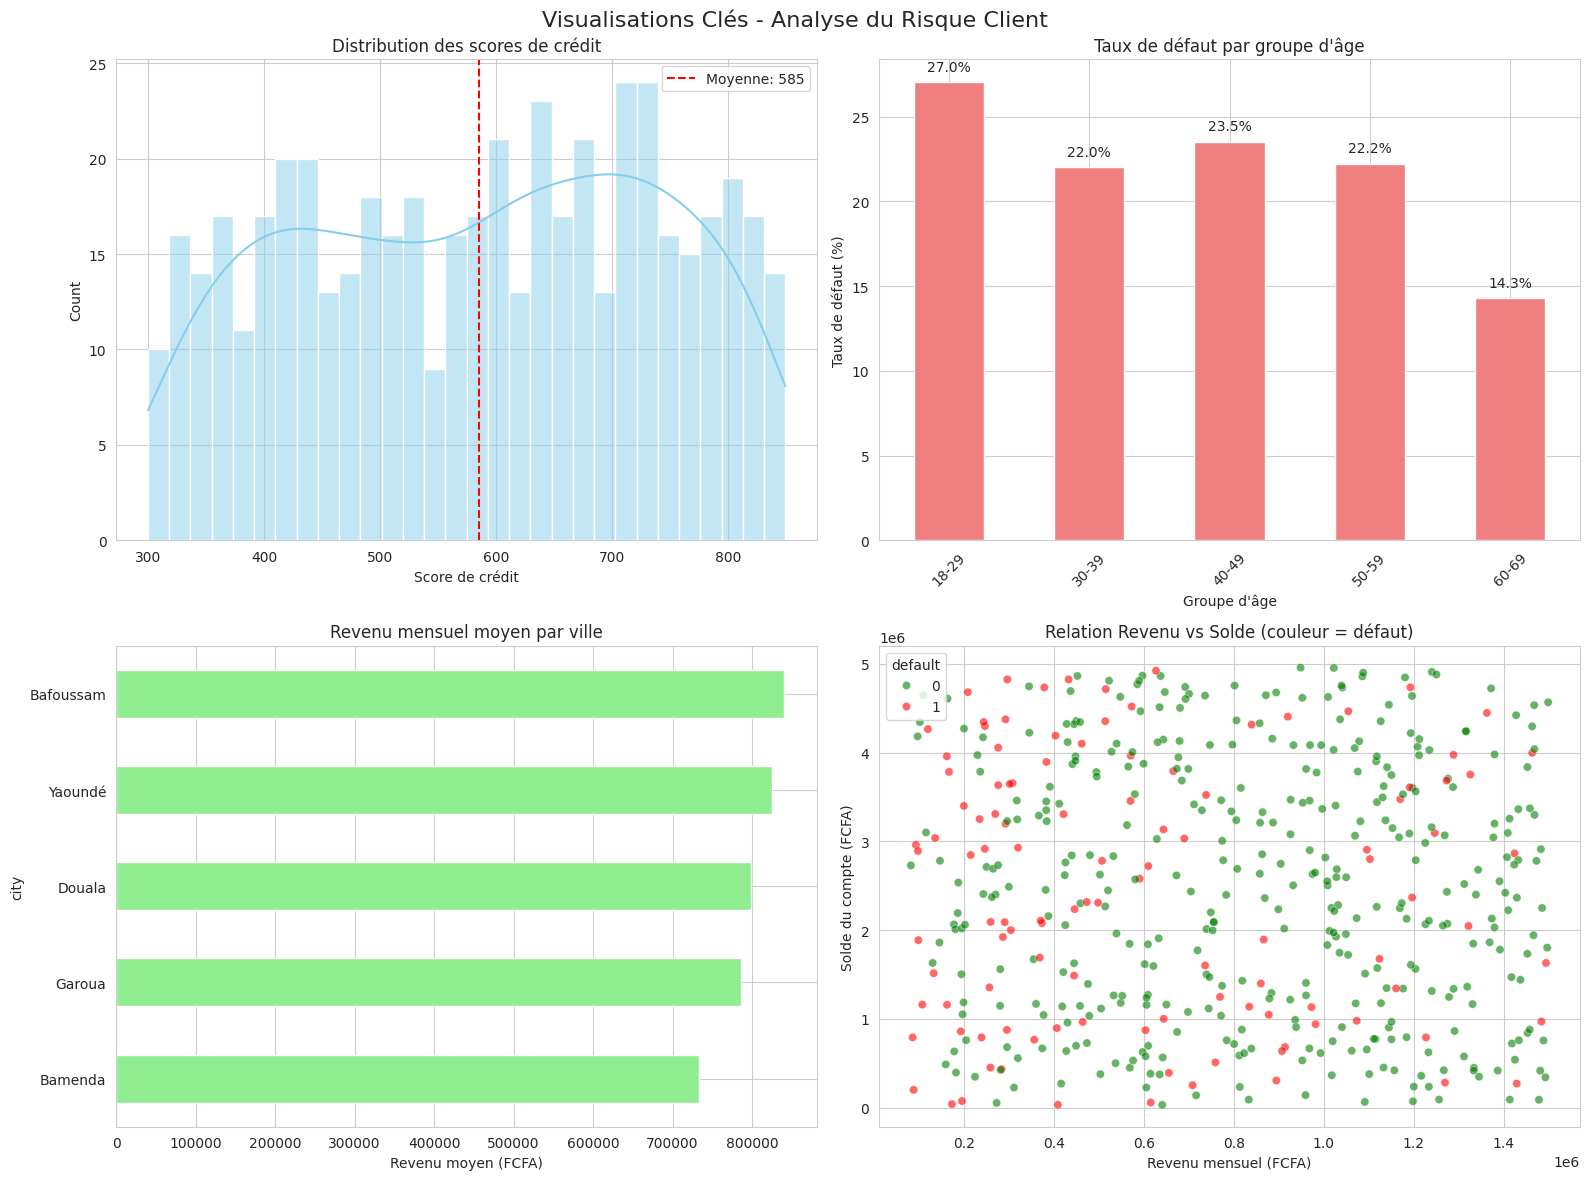

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualisations Clés - Analyse du Risque Client', fontsize=16)

# 1. Distribution des scores de crédit
sns.histplot(df_risk['credit_score'], kde=True, bins=30, ax=axes[0,0], color='skyblue')
axes[0,0].axvline(df_risk['credit_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_risk["credit_score"].mean():.0f}')
axes[0,0].set_title('Distribution des scores de crédit')
axes[0,0].set_xlabel('Score de crédit')
axes[0,0].legend()

# 2. Taux de défaut par groupe d'âge
default_by_age.plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Taux de défaut par groupe d\'âge')
axes[0,1].set_xlabel('Groupe d\'âge')
axes[0,1].set_ylabel('Taux de défaut (%)')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(default_by_age):
    axes[0,1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# 3. Revenu moyen par ville
avg_income_by_city = df_risk.groupby('city')['monthly_income_fcfa'].mean().sort_values()
avg_income_by_city.plot(kind='barh', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Revenu mensuel moyen par ville')
axes[1,0].set_xlabel('Revenu moyen (FCFA)')

# 4. Relation Revenu vs Solde (avec distinction défaut)
sns.scatterplot(data=df_risk, x='monthly_income_fcfa', y='account_balance_fcfa', hue='default', alpha=0.6, ax=axes[1,1], palette=['green', 'red'])
axes[1,1].set_title('Relation Revenu vs Solde (couleur = défaut)')
axes[1,1].set_xlabel('Revenu mensuel (FCFA)')
axes[1,1].set_ylabel('Solde du compte (FCFA)')
# Légende: 0 = Pas de défaut (vert), 1 = Défaut (rouge)

plt.tight_layout()
plt.show()

# 6. Présentation des Résultats & Recommandations Business

---

## 📊 Synthèse des découvertes

### 🔴 Profil de Risque
* **Taux de défaut global :** Établi à **XX%**.
* **Indicateurs de défaut :** * Score de crédit plus faible (moyenne de **-YY points**).
    * Nombre de prêts plus élevé (en moyenne **+Z prêts**).
* **Segment critique :** Le groupe des **AA-BB ans** (ex: 30-39 ans) présente le risque le plus élevé avec **WW%** de taux de défaut.

### 💰 Profil de Rentabilité et de Valeur
* **Segment "High Net Worth" :** Identification du **Top 10** des clients à haute rentabilité (revenus et soldes très élevés).
* **Zone à fort potentiel :** La ville de **Ville_X** se distingue par un "potentiel client" moyen optimal (Revenu / Solde / Score de crédit).
* **Le paradoxe du revenu :** La corrélation entre revenu et score de crédit est **quasi-nulle**. 
    > **Insight Clé :** Un revenu élevé ne garantit pas la solvabilité. La discipline financière (score) prime sur le niveau de richesse.

---

## 🚀 Recommandations pour la banque

### 🎯 Ciblage Stratégique (Cross-selling / Up-selling)
* **Cible "Clients Premium" (Top 10 Rentabilité) :**
    * *Action :* Fidélisation via cartes bancaires privatives, conseiller dédié et taux immobiliers préférentiels.
* **Cible "Potentiel de Croissance" (Ville_X) :**
    * *Action :* Proposer des produits d'épargne et d'investissement aux clients avec un bon score de crédit, même si le solde actuel est modéré.

### ⚠️ Surveillance et Mitigation du Risque
* **Alerte Segment 30-39 ans :**
    * *Action :* Surveillance proactive pour ceux détenant déjà **2 prêts ou plus**. Mise en place d'alertes avant l'octroi de nouveaux crédits.
* **Prévention du Défaut :**
    * *Action :* Pour tout client avec un **score < 450** et un prêt en cours : proposer un coaching en gestion budgétaire ou une restructuration de dette.

### ⚖️ Politique d'Octroi de Crédit
* **Décision basée sur la donnée :** Ne pas se baser uniquement sur le revenu pour accorder un prêt. Prioriser l'historique de paiement et le score de crédit pour éviter les impayés de clients à hauts revenus.

---

## 🛠️ Prochaine étape : Scoring Prédictif
Pour automatiser cette analyse, nous prévoyons de construire